![](files/images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © 2016 Carlos A. Iglesias
Student: Carlos Vega García

# Digits dataset

## Reading dataset

In ordert to read the dataset, we import the datasets bundle and then load the Digits dataset. 

In [51]:
# import load_digits dataset from scikit-learn
from sklearn.datasets import load_digits

# load iris dataset
digits = load_digits()

In [52]:
print(digits.data.shape)
#print(digits.DESCR)



(1797, 64)


Now we have read the dataset we can see it characteristics and values


In [53]:
print(digits.data)
print(digits.data.shape)
print(digits.target)
print(digits.target.shape)
print(digits.images.shape)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
(1797, 64)
[0 1 2 ..., 8 9 8]
(1797,)
(1797, 8, 8)


It has 1797 rows and 64 columns. So we have 1797 samples and 64 features. 


This features tell us the attributes of each sample and we have to find the correct number with them.


We can see we have 1797 target values from 0 to 9. Each one represents the number that the person wrote.

Each one of these 64 features represent the number of pixels (0 to 16) that a block(4x4) of the whole bitmap(32x32) has. So, we have an 8x8 matrix with these numbers of pixels.


We also have the images of the numbers. They have 1797 rows, each one has 8x8 pixels

## Visualization

In the dataset's webpage, they teach us how to visualize the images of the numbers. We can see all of them replacing the number of the row in the command plt.matshow(digits.images[Number])

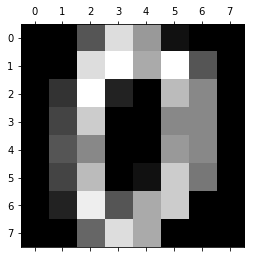

In [54]:
import matplotlib.pyplot as plt
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

The kind of data (pixels of an image) make some types of plots useless. For example, I think it makes no sense the scatter diagrams because comparing pixels between images does not give us important information.

#### Histogram

We can see how many samples of each class we have using a histogram.

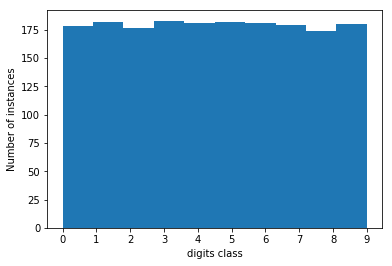

In [55]:
# Plot histogram, the default is 10 bins
%matplotlib inline
plt.hist(digits.target)
plt.ylabel('Number of instances')
plt.xlabel('digits class')
plt.xticks(range(len(digits.target_names)), digits.target_names);

So, we can see that each number has more or less the same number of appearances in the data but not the same


#### Dataframe

I represent the data as a DataFrame object from the library pandas. 

In [56]:
from sklearn import datasets
from pandas import DataFrame

# transform into dataframe
digits_df = DataFrame(digits.data)
digits_df['target'] = digits.target
digits_df.head()



,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


We can see each row of Digits and the value of each pixel. The target column shows the number that this pixels represents

## Preprocessing

#### Training set and Test set

I am going to separate the dataset in training data and test data. I'm going to take 25% of data to test. I take random_state 33 in order to have always the same distribution of data in the two types.


(In the original data we have training and test data but we don't know what rows are of each type so I'm going to do another division in order to process the data).

In [103]:
from sklearn.model_selection import train_test_split
x_digits, y_digits = digits.data, digits.target
# Test set will be the 25% taken randomly
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, test_size=0.25, random_state=33)

Now we can see the number of rows we have for each purpose and the data

In [104]:
# Dimensions of train and testing
print("Dimensions of train and testing") 
print(x_train.shape, x_test.shape)

#Train set
print("Train set") 
print (x_train)

#Test set
print("Test set") 
print (x_test)

Dimensions of train and testing
(1347, 64) (450, 64)
Train set
[[  0.   0.   1. ...,   0.   0.   0.]
 [  0.   0.   4. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   4. ...,   0.   0.   0.]
 [  0.   0.  12. ...,   0.   0.   0.]
 [  0.   1.   7. ...,   0.   0.   0.]]
Test set
[[  0.   0.   4. ...,  11.   0.   0.]
 [  0.   0.   3. ...,  16.  10.   0.]
 [  0.   0.   7. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   6. ...,  12.   1.   0.]
 [  0.   0.   0. ...,  11.   1.   0.]
 [  0.   0.   0. ...,  16.  11.   0.]]


#### Preprocessing
Now I'm going to Standardize the data in order to apply machine learning algorithms later. We need to have all the variables in the same units in order to have all of them the same weight in the algorithms. In this case I think it does not matter because the variables are all pixels


In [105]:
# Standardize the features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
# The digits dataset is now  normalized
print(x_test)

[[ 0.         -0.32672314 -0.2423893  ...,  0.73926354 -0.49709493
  -0.19054741]
 [ 0.         -0.32672314 -0.4534419  ...,  1.58229435  1.97553015
  -0.19054741]
 [ 0.         -0.32672314  0.39076852 ..., -1.11540424 -0.49709493
  -0.19054741]
 ..., 
 [ 0.         -0.32672314  0.17971592 ...,  0.90786971 -0.24983242
  -0.19054741]
 [ 0.         -0.32672314 -1.08659972 ...,  0.73926354 -0.24983242
  -0.19054741]
 [ 0.         -0.32672314 -1.08659972 ...,  1.58229435  2.22279266
  -0.19054741]]


## Machine learning
####  KNeighborsClassifier
We have preprocessed the data. Now we are going to classify the rows depending the K neighbours. In order to do that, first we have to create the model (we have to put the number of neighbours we are going to deal with). We are going to fit the model with the train rows, and finally we are going to predict the test results.

In [106]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create kNN model
model = KNeighborsClassifier(n_neighbors=15)

# Train the model using the training sets
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [107]:
print("Prediction ", model.predict(x_train))
print("Expected ", y_train)

Prediction  [4 7 4 ..., 1 5 5]
Expected  [4 7 4 ..., 1 5 5]


Here we have the precited results of the x_train rows and we can compare it with the expected results because they are the y_train. We don't see every number but we can see it success in the 6 numbers we see. So, now we are going to calculate the accuracy of the model, in other words, the probability of predict right the number that the model has.

In [108]:
# Evaluate Accuracy in training

from sklearn import metrics
y_train_pred = model.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))


Accuracy in training 0.973273942094


The accuracy in training data is 0.97 so the model predicts the right number at 97.32%

In [109]:
# Now we evaluate error in testing
y_test_pred = model.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy in testing  0.971111111111


The accuracy in test data is 0.97 so the model predicts the right number at 97.11%. It is normal that the accuracy for test data is lower than for the training one because the adjust/fit of the model is done with training data.

Now, we calculate the metrics of the model based on test data

In [110]:
print(metrics.classification_report(y_test, y_test_pred, target_names=str(digits.target)))
print(y_test)

             precision    recall  f1-score   support

          [       1.00      1.00      1.00        35
          0       0.96      0.98      0.97        54
                  1.00      1.00      1.00        44
          1       0.98      0.96      0.97        46
                  1.00      0.91      0.96        35
          2       0.98      0.96      0.97        48
                  0.98      1.00      0.99        51
          .       0.97      1.00      0.99        35
          .       0.90      0.95      0.92        58
          .       0.98      0.95      0.97        44

avg / total       0.97      0.97      0.97       450

[1 3 7 3 2 4 6 1 4 0 4 7 8 9 2 8 3 6 7 0 6 0 8 3 0 6 2 3 0 9 0 2 0 6 9 1 1
 5 8 0 6 1 5 8 9 5 1 6 2 6 6 7 6 7 7 2 7 8 0 7 3 6 3 9 6 6 5 5 4 2 9 3 7 6
 5 7 2 8 1 2 2 8 1 1 6 3 5 0 0 1 6 7 5 8 9 7 0 0 9 8 0 8 2 3 6 1 9 9 1 7 8
 9 8 8 5 9 5 1 1 9 9 3 3 2 8 1 3 8 6 4 0 0 0 7 1 5 5 1 8 5 1 8 8 6 9 9 4 5
 7 5 2 1 2 3 8 7 7 5 1 9 1 9 8 0 6 1 2 1 3 3 8 9 6 8 4 1 0 0 

The precision says the proportion of digits predicted as positives that are correctly predicted.


The Recall counts the proportion of positive digits that were correctly evaluated.


The F1-Score is a proportion between these two metrics.


In my case, the model has 0.97 of precision, recall and f1-score.

Here in the confusion matrix we can see how many times the model predicts a number wrong and which is the wrong number, in other words, the confusion between digits in the model.

In [111]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  2  0]
 [ 0  0  0  0 32  0  0  1  2  0]
 [ 0  0  0  0  0 46  1  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  2  0  1  0  0  0  0 55  0]
 [ 0  0  0  0  0  1  0  0  1 42]]


For example, with test data, the model always predicts right the digit 0. But with digit 1 it confuse it with the digit 8 one time.

### K-fold validation
We do K-fold validation with k = 10. So the model it is going to traing with 9 distincts parts of the data each time and test with the one remaining.

In [112]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('kNN', KNeighborsClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=22)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_digits, y_digits, cv=cv)
print(scores)

[ 0.98333333  0.98333333  0.96666667  0.95555556  0.98888889  0.97777778
  0.96666667  0.98882682  0.98324022  0.97206704]


We have the accuracy of each combination in the 10 fold validation and we are going to calculate the mean of every accuracy

In [113]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.977 (+/- 0.003)


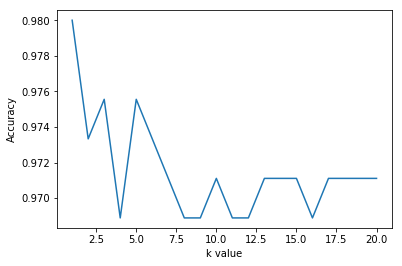

In [114]:
k_range = range(1, 21)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(x_train, y_train)
    y_test_pred = m.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')

In this plot we can see that the best K in KNN is 1 neighbours, so I'm going to repeat the algorithm with k=7

In [119]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create kNN model
model = KNeighborsClassifier(n_neighbors=1)

# Train the model using the training sets
model.fit(x_train, y_train)
from sklearn import metrics
y_train_pred = model.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
# Now we evaluate error in testing
y_test_pred = model.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred, target_names=str(digits.target)))
print(metrics.confusion_matrix(y_test, y_test_pred))

Accuracy in training 1.0
Accuracy in testing  0.98
             precision    recall  f1-score   support

          [       1.00      1.00      1.00        35
          0       0.96      1.00      0.98        54
                  1.00      0.98      0.99        44
          1       1.00      0.98      0.99        46
                  1.00      0.97      0.99        35
          2       0.96      0.98      0.97        48
                  0.98      1.00      0.99        51
          .       1.00      1.00      1.00        35
          .       0.97      0.97      0.97        58
          .       0.95      0.93      0.94        44

avg / total       0.98      0.98      0.98       450

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  1  0]
 [ 0  0  0 45  0  0  0  0  0  1]
 [ 0  0  0  0 34  0  0  0  0  1]
 [ 0  0  0  0  0 47  1  0  0  0]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  2  0  0  0  0  0  0 56  0]
 [ 0  0  0  0

So, here we can see it's right that it is better using K=1 neighbour. We have 100% accuracy in training and 98% accuracy in testing